In [1]:
import numpy as np

model_name = "sentence-transformers/all-MiniLM-L6-v2"

# Load the .npy file
data = np.load(f'../embeddings_npy/{model_name}/primary_author_embeddings.npy')

# Basic information about the array
print("Array shape:", data.shape)
print("Data type:", data.dtype)
print("Number of dimensions:", data.ndim)

# View the actual data
print("\nArray contents:")
print(data)

Array shape: (116, 384)
Data type: float64
Number of dimensions: 2

Array contents:
[[ 0.04680657 -0.06458312 -0.10805534 ...  0.00800507  0.01719845
  -0.10233658]
 [-0.02273929  0.00197116 -0.11047953 ...  0.09927788  0.01395735
  -0.04997274]
 [ 0.01488988  0.07194572 -0.0743029  ...  0.02333307  0.03769632
  -0.05667949]
 ...
 [-0.11530072 -0.03342854  0.00565055 ...  0.10915221  0.08813026
  -0.09146696]
 [-0.02740376 -0.03356524 -0.01575571 ... -0.00584918  0.12837824
  -0.01912516]
 [-0.03422765 -0.00546559 -0.01316704 ...  0.11589134 -0.05358907
  -0.00749922]]


In [2]:
author_names = np.load('../judge_names.npy')

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# Step 1: Apply PCA to reduce to 50 components
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)

In [5]:
# Determine silhouette scores for different values of k
sil_scores = []
k_range = range(2, 11)  # You can test a range of k values (e.g., 2 to 10)

In [6]:
from sklearn.metrics import silhouette_score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)
    sil_score = silhouette_score(reduced_data, clusters)
    sil_scores.append(sil_score)

/Users/gvssriram/Desktop/projects-internship/ECS-Graduate-Challenge/.venv/lib/python3.13/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/Users/gvssriram/Desktop/projects-internship/ECS-Graduate-Challenge/.venv/lib/python3.13/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
        "sysctl -n hw.physicalcpu".split(),
        capture_output=True,
        text=True,
    )
  File "/opt/homebrew/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/ho

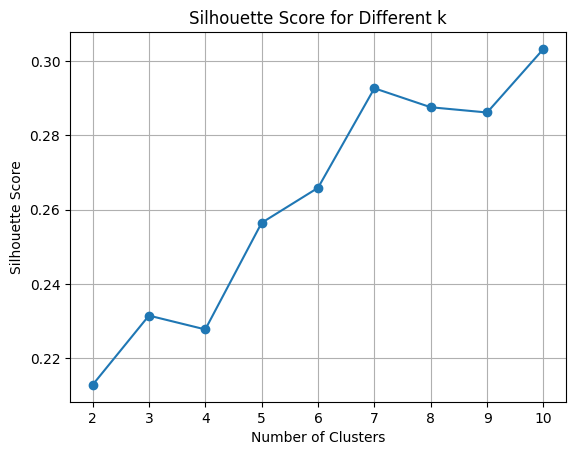

The optimal number of clusters (k) based on the Silhouette Score is: 10


In [7]:
# Plot the silhouette scores
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)
plt.show()

# Output the best k (which gives the highest silhouette score)
best_k = k_range[np.argmax(sil_scores)]
print(f"The optimal number of clusters (k) based on the Silhouette Score is: {best_k}")

In [8]:
# Step 2: Apply K-Means clustering
n_clusters = 7  # You can change the number of clusters as per your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

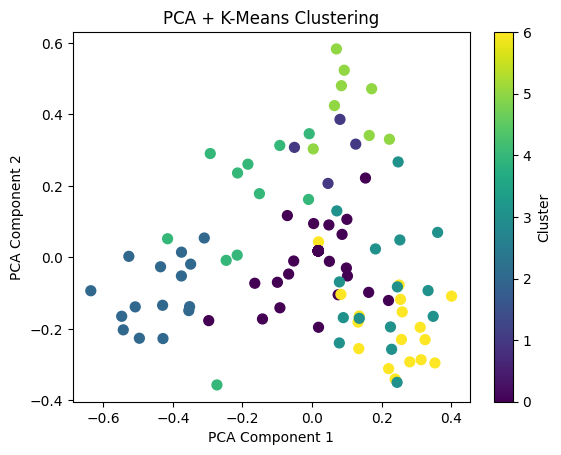

Cluster Centers (in reduced space):
[[ 1.30452634e-02 -2.64545385e-03 -4.49787468e-02 -1.63303256e-01
   3.38365462e-02 -4.30481931e-03 -1.78279476e-02 -3.11664166e-02
   1.92360552e-02 -6.87691101e-03]
 [ 5.03526361e-02  3.04634071e-01  3.01547969e-02  5.62006863e-02
   2.36140845e-01  2.00269938e-01  1.61043332e-01  2.61299257e-01
  -1.31291559e-01  8.64795838e-02]
 [-4.44158773e-01 -9.97998177e-02 -5.82002892e-03  1.52834601e-01
   4.60671705e-02  6.15166361e-02  3.97815852e-02 -6.18422592e-03
   8.22399591e-03 -4.29048045e-02]
 [ 2.08171224e-01 -8.31625945e-02  2.20398999e-01  1.37351389e-01
   6.50438946e-02  6.83451312e-02 -6.86543589e-02 -1.02816245e-01
  -7.32487283e-02 -1.63435218e-02]
 [-1.91105232e-01  1.34763601e-01  1.54435782e-01 -7.42745419e-03
  -1.60153958e-01 -1.21397745e-01 -1.33597820e-01  1.41453900e-01
   1.22737606e-02  9.61580832e-02]
 [ 1.09141269e-01  4.32572069e-01 -2.14873565e-01  1.86184108e-01
  -1.04094211e-01 -2.94522740e-03 -3.95412562e-03 -1.74176761e-

In [9]:
# Step 3: (Optional) Visualize the results if you'd like
# You can visualize the clustering result using the first two PCA components
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('PCA + K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# To print the cluster centers and labels:
print("Cluster Centers (in reduced space):")
print(kmeans.cluster_centers_)

print("Labels for each data point:")
print(clusters)

In [10]:
# Step 4: Create a DataFrame with author names and their assigned clusters
import pandas as pd
import os
author_cluster_df = pd.DataFrame({
    'Author': author_names,
    'Cluster': clusters
})

# Sort by cluster for better readability
author_cluster_df = author_cluster_df.sort_values(by='Cluster')

# Print the results
print(author_cluster_df)

# Optional: Save the result to a new CSV file
os.makedirs(f'{model_name}', exist_ok=True)
author_cluster_df.to_csv(f'{model_name}/author_clusters.csv', index=False)

              Author  Cluster
81         Utpal Roy        0
49     Kasey Laurent        0
83  Ashok S. Sangani        0
27        Zhenyu Gan        0
55       Eric M. Lui        0
..               ...      ...
79    Farzana Rahman        6
36     Endadul Hoque        6
77         Qinru Qiu        6
96        Yuzhe Tang        6
13   C.Y. Roger Chen        6

[116 rows x 2 columns]


In [11]:
import pandas as pd
import json
import os

In [12]:


# Paths
csv_path = f'{model_name}/author_clusters.csv'  # Replace with actual CSV file path
json_folder = "../../../faculty_scholarly/"  # Folder containing JSON files

# Load CSV file
df = pd.read_csv(csv_path)

# Function to format author names into JSON filenames
def format_filename(author_name):
    return author_name.lower().replace(" ", "_") + ".json"

# Function to extract interests from a JSON file
def get_interests(author_name):
    json_file = os.path.join(json_folder, format_filename(author_name))
    if os.path.exists(json_file):
        with open(json_file, "r", encoding="utf-8") as f:
            data = json.load(f)
            return ", ".join(data.get("interests", []))  # Convert list to a comma-separated string
    return ""

# Add interests column
df["interests"] = df["Author"].apply(get_interests)

# Save updated CSV
df.to_csv(f"{model_name}/updated_authors.csv", index=False)
print("CSV file updated successfully!")


CSV file updated successfully!


In [17]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def find_ngram_collocations(tokens, n=2, top_n=50):
    if n == 2:
        finder = BigramCollocationFinder.from_words(tokens)
        measures = BigramAssocMeasures()
    else:
        finder = TrigramCollocationFinder.from_words(tokens)
        measures = TrigramAssocMeasures()
    
    # Filter out ngrams with stopwords or short words
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(["research", "interests", "based", "using", "used", "well", "also"])
    stop_words = stop_words.union(custom_stopwords)
    
    finder.apply_word_filter(lambda w: w in stop_words or len(w) < 3)
    
    # Get top collocations by PMI score
    return finder.nbest(measures.pmi, top_n)

def preprocess_text_with_phrases(text):
    if pd.isna(text):
        return ""
    
    # Initial tokenization
    tokens = word_tokenize(text.lower())
    
    # Find common bigrams and trigrams
    bigrams = find_ngram_collocations(tokens, n=2)
    trigrams = find_ngram_collocations(tokens, n=3)
    
    # Replace spaces with underscores in the original text for identified phrases
    processed_text = text.lower()
    
    # Replace trigrams first (to avoid overlapping with bigrams)
    for trigram in trigrams:
        phrase = " ".join(trigram)
        if phrase in processed_text:
            processed_text = processed_text.replace(phrase, "_".join(trigram))
    
    # Then replace bigrams
    for bigram in bigrams:
        phrase = " ".join(bigram)
        if phrase in processed_text:
            processed_text = processed_text.replace(phrase, "_".join(bigram))
    
    # Tokenize again after phrase replacement
    tokens = word_tokenize(processed_text)
    
    # Remove stopwords and short words
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(["research", "interests", "based", "using", "used", "well", "also"])
    stop_words = stop_words.union(custom_stopwords)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 3]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

def calculate_cluster_similarity(texts):
    if len(texts) <= 1:
        return 0.0
    
    # Create TF-IDF matrix
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Calculate pairwise similarities
    similarities = cosine_similarity(tfidf_matrix)
    
    # Get average similarity (excluding self-similarity)
    n = similarities.shape[0]
    total_sim = (similarities.sum() - n) / 2  # Subtract diagonal and divide by 2 (symmetric matrix)
    num_pairs = (n * (n - 1)) / 2
    
    return total_sim / num_pairs if num_pairs > 0 else 0.0

def create_cluster_wordcloud(text, title, output_file):
    # Replace underscores with spaces for display
    display_text = text.replace("_", " ")
    
    wordcloud = WordCloud(width=1200, height=800, 
                         background_color='white',
                         colormap='viridis',
                         min_font_size=10,
                         collocations=False,  # Disable built-in collocations
                         max_words=50).generate(display_text)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, pad=20)
    plt.savefig(output_file, bbox_inches='tight', dpi=300)
    plt.close()

def analyze_research_interests(df: pd.DataFrame):    
    # Preprocess interests
    df['processed_interests'] = df['interests'].apply(preprocess_text_with_phrases)
    
     # Create word clouds for each cluster
    for cluster in sorted(df['Cluster'].unique()):
        cluster_text = " ".join(df[df['Cluster'] == cluster]['processed_interests'].dropna())
        if cluster_text.strip():  # Only create wordcloud if there's text
            create_cluster_wordcloud(
                cluster_text, 
                f'Research Interests Word Cloud - Cluster {cluster}',
                f'{model_name}/wordcloud_cluster_{cluster}.png'
            )
    
    # Work in progress
    # Calculate cluster similarities
    # similarities = {}
    # for cluster in df['Cluster'].unique():
    #     cluster_texts = df[df['Cluster'] == cluster]['processed_interests'].dropna().tolist()
    #     similarities[cluster] = calculate_cluster_similarity(cluster_texts)
    
    # Create similarity visualization
    # plt.figure(figsize=(10, 6))
    # clusters = sorted(similarities.keys())
    # similarity_values = [similarities[c] for c in clusters]
    
    # sns.barplot(x=clusters, y=similarity_values)
    # plt.title('Cluster Internal Similarity Scores')
    # plt.xlabel('Cluster')
    # plt.ylabel('Average Cosine Similarity')
    
    # # Add percentage labels on top of bars
    # for i, v in enumerate(similarity_values):
    #     plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')
    
    # plt.savefig(f'{model_name}/cluster_similarities.png', bbox_inches='tight', dpi=300)
    # plt.close()
    
    # Print top terms per cluster
    print("\nTop 15 terms per cluster (including phrases):")
    for cluster in sorted(df['Cluster'].unique()):
        cluster_text = " ".join(df[df['Cluster'] == cluster]['processed_interests'].dropna())
        # Split on whitespace and underscores
        words = re.findall(r'\b\w+(?:_\w+)*\b', cluster_text)
        word_freq = Counter(words).most_common(15)
        print(f"\nCluster {cluster}:")
        for word, freq in word_freq:
            # Replace underscores with spaces for display
            display_word = word.replace("_", " ")
            print(f"  {display_word}: {freq}")

# Usage
analyze_research_interests(df)

[nltk_data] Downloading package punkt to /Users/gvssriram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gvssriram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gvssriram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Top 15 terms per cluster (including phrases):

Cluster 0:
  composite material: 3
  component design: 2
  machine learning: 2
  bio: 2
  structure: 2
  durability: 2
  damage tolerance: 2
  computational fluid dynamics: 2
  gait analysis: 1
  trajectory optimization: 1
  legged locomotion: 1
  multibody dynamics: 1
  robotics: 1
  applied electromagnetics: 1
  artificial materials: 1

Cluster 1:
  indoor air quality: 3
  air purification: 2
  ventilation: 2
  computational fluid dynamics: 2
  heat: 2
  mass transfer: 2
  multi: 2
  indoor environmental quality: 2
  turbomachinery design: 1
  performance analysis: 1
  airborne pathogen transmission risk mitigation: 1
  turbomachinery: 1
  multiphase flow: 1
  measurement: 1
  instrumentation: 1

Cluster 2:
  tissue engineering: 6
  mechanic: 4
  microfluidics: 3
  biomaterials: 3
  nanomedicine: 2
  smart materials: 2
  interface: 2
  instability: 2
  biomechanics: 2
  organoids: 2
  mechanobiology: 2
  tribology: 2
  material: 2
  bio